In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 각 리그, 각 포지션별 선수에게 훈련 추천
- 미리 뽑아둔 feature를 사용
- 특정 리그에 대해서
- 5대 리그 통합에 대해서

## 작동 방식
- 선수 입력
- 포지션 입력
- 리그 선택 -> BL, EPL, LL, L1, SA, 통합 중 택1
- 해당 리그에서 선택한 포지션에 해당하는 feature에 대하여 평균치, 최대, 최소 등 통계치를 구한다.
- 입력한 선수가 각각의 feature에 대해서 stat이 부족한지 확인하여 말해준다.

## 데이터 가져오기

In [2]:
league_features = {'1' :{'FW':['Assists', 'PS%', 'Goals'], 
                         'AM':['PS%', 'Goals', 'ThrB', 'SpG', 'Assists'],
                         'M':['PS%', 'Goals', 'AvgP', 'ThrB', 'Assists'],
                         'DM':['PS%'],
                         'D':['PS%', 'AvgP'],
                         'GK':['PS%', 'Dribble', 'Fouls', 'Disp']},
                   '2' :{'FW':['Goals', 'SpG', 'PS%', 'KeyP', 'Assists'],
                         'AM':['PS%', 'AvgP', 'Goals', 'SpG', 'Assists'],
                         'M':['Assists', 'ThrB', 'KeyP', 'LongB', 'SpG'],
                         'DM':['Assists', 'ThrB', 'Goals', 'KeyP'],
                         'D':['PS%', 'AvgP', 'ThrB', 'Assists'],
                         'GK':['PS%', 'Mins']},
                   '3' :{'FW':['PS%', 'KeyP', 'Dribble', 'ThrB', 'SpG'],
                         'AM':['AvgP', 'Assists', 'KeyP', 'ThrB', 'PS%'],
                         'M':['PS%', 'AvgP', 'Assists', 'Blocks', 'LongB'],
                         'DM':['AvgP', 'ThrB', 'PS%', 'AerialsWon', 'Fouled'],
                         'D':['PS%', 'AvgP', 'ThrB'],
                         'GK':['PS%', 'AvgP']},
                   '4':{'FW':['Assists', 'Goals'],
                        'AM':['Assists', 'PS%', 'Dribble', 'SpG', 'ThrB'],
                        'M':['PS%', 'Assists'],
                        'DM':['PS%', 'AvgP', 'LongB', 'Blocks'],
                        'D':['PS%', 'AvgP', 'Assists'],
                        'GK':['PS%', 'KeyP']},
                   '5':{'FW':['Goals', 'Assists', 'SpG', 'KeyP'],
                        'AM':['Assists'],
                        'M':['PS%'],
                        'DM':['PS%'],
                        'D':['PS%'],
                        'GK':['PS%']},
                   '6': {'FW':['Goals', 'Assists', 'SpG', 'PS%', 'ThrB'],
                         'AM':['Goals', 'Assists', 'PS%', 'SpG', 'AvgP'],
                         'M':['PS%', 'Assists', 'AvgP', 'Goals'],
                         'DM':['PS%', 'AvgP'],
                         'D':['PS%', 'AvgP'],
                         'GK':['PS%']}}

In [3]:
BL_player = pd.read_csv('./EDA/5_League/Budesliga_data/BL_player_value_merged.csv')
EPL_player = pd.read_csv('./EDA/5_League/EPL_data/EPL_player_value_merged.csv')
LL_player = pd.read_csv('./EDA/5_League/Laliga_data/LL_player_value_merged.csv')
L1_player = pd.read_csv('./EDA/5_League/League1_data/L1_player_value_merged.csv')
SA_player = pd.read_csv('./EDA/5_League/SerieA_data/SA_player_value_merged.csv')

## 데이터 전처리
- 필요없는 컬럼 삭제
- Position 재정의

In [4]:
BL_player.drop('Unnamed: 0', axis=1, inplace=True)
EPL_player.drop('Unnamed: 0', axis=1, inplace=True)
LL_player.drop('Unnamed: 0', axis=1, inplace=True)
L1_player.drop('Unnamed: 0', axis=1, inplace=True)
SA_player.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
po_li = BL_player['Position']
for i in range(BL_player.shape[0]):
    if po_li[i] == 'Attacking Midfield':
        po_li[i] = 'AM'
    elif po_li[i] == 'Central Midfield' or po_li[i] == 'Left Midfield' or po_li[i] == 'Right Midfield':
        po_li[i] = 'M'
    elif po_li[i] == 'Defensive Midfield':
        po_li[i] = 'DM'
    elif po_li[i] == 'Centre-Back' or po_li[i] == 'Right-Back' or po_li[i] == 'Left-Back':
        po_li[i] = 'D'
    elif po_li[i] == 'Centre-Forward' or po_li[i] == 'Right Winger' or po_li[i] == 'Left Winger' or po_li[i] == 'Second Striker':
        po_li[i] = 'FW'
    elif po_li[i] == 'Goalkeeper':
        po_li[i] = 'GK'
        
BL_player['Position'] = pd.DataFrame(po_li, columns=['Position'])
BL_player['Position']

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/3410667279.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'AM'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/3410667279.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'M'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/3410667279.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'D'
/var/fol

0      AM
1       M
2       D
3      AM
4       M
       ..
270    FW
271    GK
272     M
273     D
274    FW
Name: Position, Length: 275, dtype: object

In [6]:
po_li = EPL_player['Position']
for i in range(EPL_player.shape[0]):
    if po_li[i] == 'Attacking Midfield':
        po_li[i] = 'AM'
    elif po_li[i] == 'Central Midfield' or po_li[i] == 'Left Midfield' or po_li[i] == 'Right Midfield':
        po_li[i] = 'M'
    elif po_li[i] == 'Defensive Midfield':
        po_li[i] = 'DM'
    elif po_li[i] == 'Centre-Back' or po_li[i] == 'Right-Back' or po_li[i] == 'Left-Back':
        po_li[i] = 'D'
    elif po_li[i] == 'Centre-Forward' or po_li[i] == 'Right Winger' or po_li[i] == 'Left Winger' or po_li[i] == 'Second Striker':
        po_li[i] = 'FW'
    elif po_li[i] == 'Goalkeeper':
        po_li[i] = 'GK'
        
EPL_player['Position'] = pd.DataFrame(po_li, columns=['Position'])
EPL_player['Position']

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/2424994410.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'M'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/2424994410.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'D'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/2424994410.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'FW'
/var/fo

0       M
1       D
2       D
3       D
4      FW
       ..
299    GK
300    FW
301    FW
302    DM
303     M
Name: Position, Length: 304, dtype: object

In [7]:
po_li = LL_player['Position']
for i in range(LL_player.shape[0]):
    if po_li[i] == 'Attacking Midfield':
        po_li[i] = 'AM'
    elif po_li[i] == 'Central Midfield' or po_li[i] == 'Left Midfield' or po_li[i] == 'Right Midfield':
        po_li[i] = 'M'
    elif po_li[i] == 'Defensive Midfield':
        po_li[i] = 'DM'
    elif po_li[i] == 'Centre-Back' or po_li[i] == 'Right-Back' or po_li[i] == 'Left-Back':
        po_li[i] = 'D'
    elif po_li[i] == 'Centre-Forward' or po_li[i] == 'Right Winger' or po_li[i] == 'Left Winger' or po_li[i] == 'Second Striker':
        po_li[i] = 'FW'
    elif po_li[i] == 'Goalkeeper':
        po_li[i] = 'GK'
        
LL_player['Position'] = pd.DataFrame(po_li, columns=['Position'])
LL_player['Position']

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/1534325327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'D'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/1534325327.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'FW'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/1534325327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'M'
/var/fo

0       D
1       D
2      FW
3      FW
4       M
       ..
314    DM
315     D
316    FW
317     M
318     M
Name: Position, Length: 319, dtype: object

In [8]:
po_li = L1_player['Position']
for i in range(L1_player.shape[0]):
    if po_li[i] == 'Attacking Midfield':
        po_li[i] = 'AM'
    elif po_li[i] == 'Central Midfield' or po_li[i] == 'Left Midfield' or po_li[i] == 'Right Midfield':
        po_li[i] = 'M'
    elif po_li[i] == 'Defensive Midfield':
        po_li[i] = 'DM'
    elif po_li[i] == 'Centre-Back' or po_li[i] == 'Right-Back' or po_li[i] == 'Left-Back':
        po_li[i] = 'D'
    elif po_li[i] == 'Centre-Forward' or po_li[i] == 'Right Winger' or po_li[i] == 'Left Winger' or po_li[i] == 'Second Striker':
        po_li[i] = 'FW'
    elif po_li[i] == 'Goalkeeper':
        po_li[i] = 'GK'
        
L1_player['Position'] = pd.DataFrame(po_li, columns=['Position'])
L1_player['Position']

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/2632924717.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'FW'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/2632924717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'M'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/2632924717.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'D'
/var/fo

0      FW
1       M
2       M
3      FW
4       D
       ..
310     D
311     D
312     D
313     D
314    FW
Name: Position, Length: 315, dtype: object

In [9]:
po_li = SA_player['Position']
for i in range(SA_player.shape[0]):
    if po_li[i] == 'Attacking Midfield':
        po_li[i] = 'AM'
    elif po_li[i] == 'Central Midfield' or po_li[i] == 'Left Midfield' or po_li[i] == 'Right Midfield':
        po_li[i] = 'M'
    elif po_li[i] == 'Defensive Midfield':
        po_li[i] = 'DM'
    elif po_li[i] == 'Centre-Back' or po_li[i] == 'Right-Back' or po_li[i] == 'Left-Back':
        po_li[i] = 'D'
    elif po_li[i] == 'Centre-Forward' or po_li[i] == 'Right Winger' or po_li[i] == 'Left Winger' or po_li[i] == 'Second Striker':
        po_li[i] = 'FW'
    elif po_li[i] == 'Goalkeeper':
        po_li[i] = 'GK'
        
SA_player['Position'] = pd.DataFrame(po_li, columns=['Position'])
SA_player['Position']

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/1519857846.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'FW'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/1519857846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'M'
/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_77426/1519857846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_li[i] = 'D'
/var/fo

0      FW
1      FW
2       M
3       D
4       D
       ..
300    FW
301    FW
302    FW
303    FW
304     M
Name: Position, Length: 305, dtype: object

In [10]:
#BL_player.to_csv('BL_player_stats_value.csv')
#EPL_player.to_csv('EPL_player_stats_value.csv')
#LL_player.to_csv('LL_player_stats_value.csv')
#L1_player.to_csv('L1_player_stats_value.csv')
#SA_player.to_csv('SA_player_stats_value.csv')

## 데이터 병합

In [11]:
BL_player = pd.read_csv('./player stats value/BL_player_stats_value.csv')
EPL_player = pd.read_csv('./player stats value/EPL_player_stats_value.csv')
LL_player = pd.read_csv('./player stats value/LL_player_stats_value.csv')
L1_player = pd.read_csv('./player stats value/L1_player_stats_value.csv')
SA_player = pd.read_csv('./player stats value/SA_player_stats_value.csv')

In [12]:
all_player = pd.concat([BL_player, EPL_player, LL_player, L1_player, SA_player], ignore_index=True)

In [13]:
player_df_list = [BL_player, EPL_player, LL_player, L1_player, SA_player, all_player]

# 통계 도출 프로그램

In [14]:
player = input('선수 이름을 입력하세요 : ')
league = input('리그를 선택하세요\n1. Bundesliga\n2. EPL\n3. Laliga\n4. Ligue1\n5. SerieA\n6. Big_5\n리그 입력:')
position = input("포지션을 입력하세요 : ")

selected_player = all_player[all_player['player_name'] == player]
features = league_features[str(league)][position]

선수 이름을 입력하세요 : Erling Haaland
리그를 선택하세요
1. Bundesliga
2. EPL
3. Laliga
4. Ligue1
5. SerieA
6. Big_5
리그 입력:6
포지션을 입력하세요 : FW


## 특정 리그에 대해서 통계치 보여주기

In [15]:
# 선택된 리그, 포지션에 해당하는 feature만 뽑아서 보여준다.
selected_league_player_df = player_df_list[int(league)-1]
selected_league_position = selected_league_player_df[selected_league_player_df['Position'] == position][features]
selected_league_position

,Goals,Assists,SpG,PS%,ThrB
5,9,3,2.3,76.6,0.1
11,4,3,1.9,73.7,0.1
16,2,1,0.7,55.1,0.1
19,7,0,1.5,68.3,0.0
24,12,3,2.0,82.8,0.0
...,...,...,...,...,...
1506,8,4,2.0,69.1,0.1
1513,6,0,1.2,58.9,0.0
1514,2,2,1.1,72.3,0.1
1515,2,1,1.0,73.0,0.0


In [16]:
selected_league_position_stats = selected_league_position.describe().loc[['mean', 'min', 'max']]
selected_league_position_stats

,Goals,Assists,SpG,PS%,ThrB
mean,5.838269,2.767654,1.479954,74.199544,0.045558
min,0.000000,0.000000,0.100000,44.600000,0.000000
max,36.000000,16.000000,4.500000,92.400000,1.200000


In [17]:
selected_player[features]

,Goals,Assists,SpG,PS%,ThrB
338,36,8,3.5,74.8,0.1


In [18]:
for i in range(len(features)):
    league_stats = selected_league_position_stats[[features[i]]]
    print(league_stats)
    print(f'Player Stats: {selected_player[features[i]].tolist()[0]}')
    print('--------------------')

          Goals
mean   5.838269
min    0.000000
max   36.000000
Player Stats: 36
--------------------
        Assists
mean   2.767654
min    0.000000
max   16.000000
Player Stats: 8
--------------------
           SpG
mean  1.479954
min   0.100000
max   4.500000
Player Stats: 3.5
--------------------
            PS%
mean  74.199544
min   44.600000
max   92.400000
Player Stats: 74.8
--------------------
          ThrB
mean  0.045558
min   0.000000
max   1.200000
Player Stats: 0.1
--------------------


# 선수 가격 예측 모델

In [19]:
all_player

,Unnamed: 0,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,...,Offsides,Clear,Drb,Blocks,OwnG,Position,Date of Birth,Age,Nationality,Market Value
0,0,Christopher Nkunku,7614,RBL,25,"M(CLR),FW",20(5),1899,4,1.6,...,0.0,0.4,0.2,0.1,0,AM,"Nov 14, 1997",25,France,€80.00m
1,1,Dominik Szoboszlai,7614,RBL,22,AM(CLR),28(3),2453,8,2.3,...,0.0,0.7,0.8,0.1,0,M,"Oct 25, 2000",22,Hungary,€50.00m
2,2,Willi Orbán,7614,RBL,30,D(C),33,2951,0,0.2,...,0.5,3.9,0.5,0.7,1,D,"Nov 3, 1992",30,Hungary,€10.00m
3,3,Dani Olmo,7614,RBL,25,"AM(CLR),FW",15(8),1285,5,1.7,...,0.0,0.2,0.3,0.0,0,AM,"May 7, 1998",25,Spain,€40.00m
4,4,Konrad Laimer,7614,RBL,26,"D(R),M(CR)",17(4),1474,0,0.8,...,0.0,0.3,1.1,0.2,0,M,"May 27, 1997",26,Austria,€28.00m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,300,Assan Ceesay,79,Lecce,29,FW,20(14),1818,0,0.2,...,0.0,0.6,0.2,0.1,0,FW,"Mar 17, 1994",29,The Gambia,€2.50m
1514,301,Federico Di Francesco,79,Lecce,29,"M(LR),FW",23(13),2040,2,0.7,...,0.0,0.4,0.3,0.0,0,FW,"Jun 14, 1994",29,Italy,€1.80m
1515,302,Lameck Banda,79,Lecce,22,AM(L),19(17),1637,1,0.4,...,0.0,0.1,0.7,0.1,0,FW,"Jan 29, 2001",22,Zambia,€4.00m
1516,303,Lorenzo Colombo,79,Lecce,21,FW,18(15),1518,2,0.5,...,0.0,0.2,0.2,0.0,0,FW,"Mar 8, 2002",21,Italy,€5.00m


In [20]:
# 가격이 결측인 행은 삭제

all_player['Market Value'].replace('-', np.nan, inplace=True)
all_player.dropna(subset=['Market Value'], inplace=True)
all_player.reset_index(inplace=True)
all_player.drop('index', axis=True, inplace=True)

In [21]:
value_li = all_player['Market Value'].tolist()

for i in range(all_player.shape[0]):
    value = float(value_li[i][1:len(value_li[i])-1])
    m = value_li[i][-1]
    
    if m == 'm':
        value *= 1000
        
    value_li[i] = value
    
all_player['Market Value'] = pd.DataFrame(value_li)

In [22]:
all_player[['Market Value']]

,Market Value
0,80000.0
1,50000.0
2,10000.0
3,40000.0
4,28000.0
...,...
1512,2500.0
1513,1800.0
1514,4000.0
1515,5000.0


# sm.OLS

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# 모든 feature 사용

data_tmp = all_player.select_dtypes(['int64', 'float64'])
data = data_tmp.drop(['Market Value', 'team_number'], axis=1)

X = sm.add_constant(data, has_constant='add')
y = data_tmp[['Market Value']]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

linear_reg_model = sm.OLS(y_train1, X_train1)
linear_reg_fitted_model = linear_reg_model.fit()
print(linear_reg_fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Market Value   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     45.68
Date:                Wed, 08 May 2024   Prob (F-statistic):          6.69e-178
Time:                        17:14:50   Log-Likelihood:                -13172.
No. Observations:                1213   AIC:                         2.641e+04
Df Residuals:                    1181   BIC:                         2.657e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.409e+05   2.29e+04     -6.143      0.0

In [25]:
linear_reg_pred = linear_reg_fitted_model.predict(X_test1)
linear_reg_pred

724     14116.575062
812      4330.522968
1466    22344.777950
1469    24715.641236
51      14082.799571
            ...     
358     33451.988652
1169    22842.459507
111     17919.792137
1292    33465.429921
816     -7625.760569
Length: 304, dtype: float64

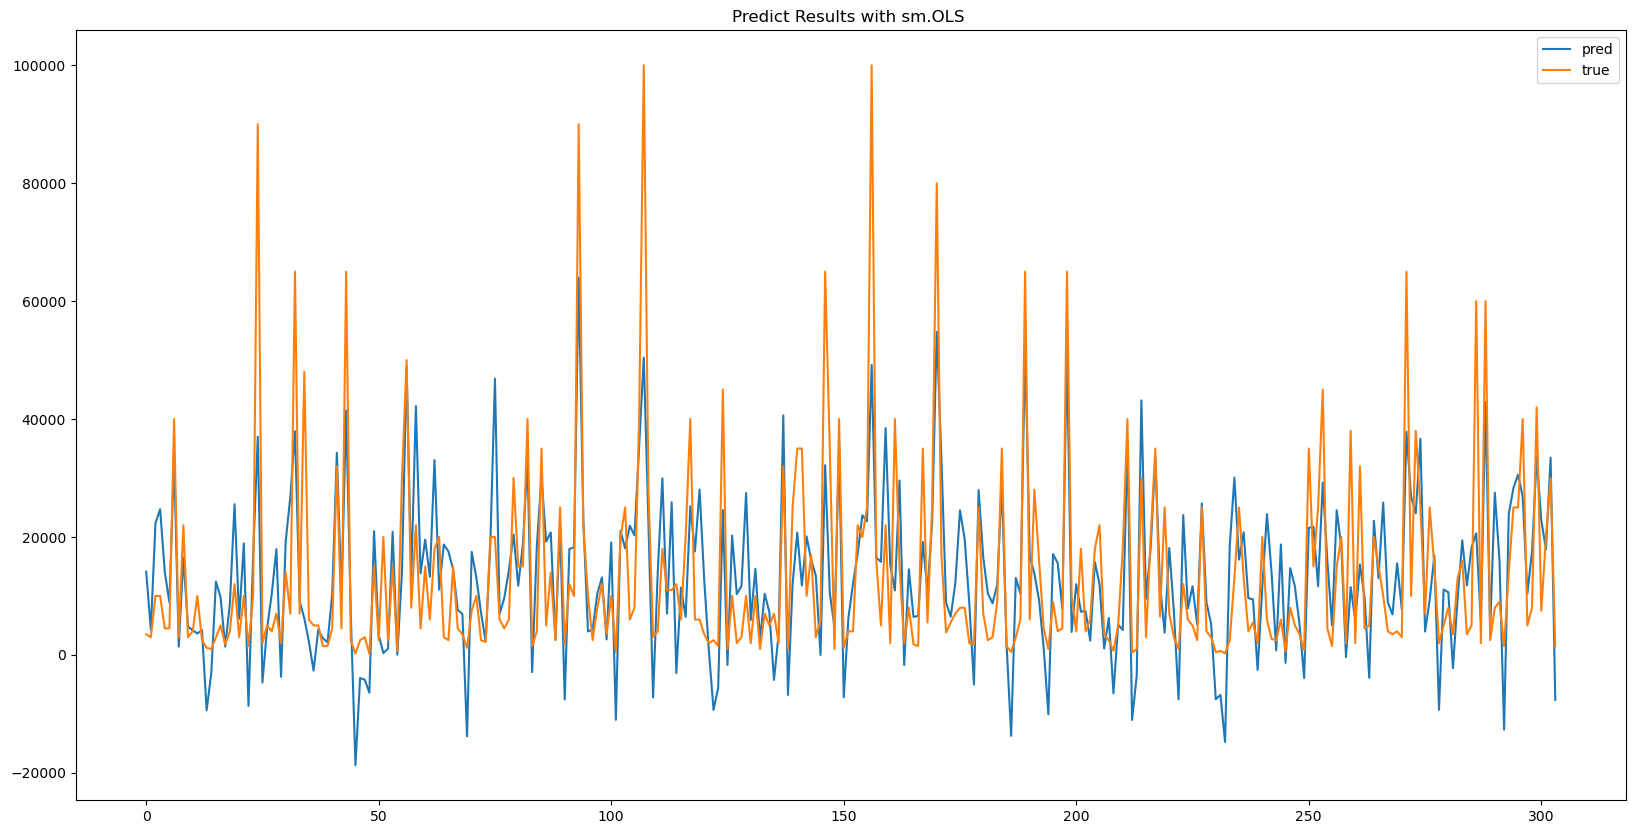

In [26]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(linear_reg_pred), label='pred')
plt.plot(np.array(y_test1), label='true')
plt.title('Predict Results with sm.OLS ')
plt.legend()
plt.show()

In [27]:
np.array(linear_reg_pred) - np.array(y_test1)

array([[ 10616.5750625 ,    830.52296773,  18844.77795046, ...,
         14419.79213675,  29965.4299208 , -11125.76056887],
       [ 11116.5750625 ,   1330.52296773,  19344.77795046, ...,
         14919.79213675,  30465.4299208 , -10625.76056887],
       [  4116.5750625 ,  -5669.47703227,  12344.77795046, ...,
          7919.79213675,  23465.4299208 , -17625.76056887],
       ...,
       [ -5883.4249375 , -15669.47703227,   2344.77795046, ...,
         -2080.20786325,  13465.4299208 , -27625.76056887],
       [-15883.4249375 , -25669.47703227,  -7655.22204954, ...,
        -12080.20786325,   3465.4299208 , -37625.76056887],
       [ 12616.5750625 ,   2830.52296773,  20844.77795046, ...,
         16419.79213675,  31965.4299208 ,  -9125.76056887]])

In [28]:
MSE = (np.array(linear_reg_pred) - np.array(y_test1)).sum() ** 2 / X_test.shape[0]
MSE

NameError: name 'X_test' is not defined

## feature 조정

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# 모든 feature 사용

data_tmp = all_player.select_dtypes(['int64', 'float64'])
data = data_tmp.drop(['Market Value', 'team_number', 'KeyP', 'MoM', 'Dribble', 'Tackles', 'Mins', 'Age', 'OwnG', 'Offsides', 'Off', 'Blocks', 'Red'], axis=1)

X = sm.add_constant(data, has_constant='add')
y = data_tmp[['Market Value']]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

linear_reg_model3 = sm.OLS(y_train3, X_train3)
linear_reg_fitted_model3 = linear_reg_model3.fit()
print(linear_reg_fitted_model3.summary())

In [ ]:
linear_reg_pred3 = linear_reg_fitted_model3.predict(X_test3)
linear_reg_pred3

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(linear_reg_pred3), label='pred')
plt.plot(np.array(y_test3), label='true')
plt.title('Predict Results with sm.OLS(feature removed)')
plt.legend()
plt.show()

In [ ]:
MSE3 = (np.array(linear_reg_pred3) - np.array(y_test3)).sum() ** 2 / X_test3.shape[0]
MSE3

# LinearRegression

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# 모든 feature 사용

data_tmp = all_player.select_dtypes(['int64', 'float64'])

X = data_tmp.drop(['Market Value', 'team_number'], axis=1)
y = data_tmp[['Market Value']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

linear_reg_model2 = LinearRegression()
linear_reg_fitted_model2 = linear_reg_model2.fit(X_train2, y_train2)

In [ ]:
linear_reg_pred2 = linear_reg_fitted_model2.predict(X_test2)
linear_reg_pred2

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.array(linear_reg_pred2), label='pred')
plt.plot(np.array(y_test2), label='true')
plt.legend()
plt.show()

In [ ]:
np.array(linear_reg_pred2) - np.array(y_test2)

In [ ]:
MSE2 = (np.array(linear_reg_pred2) - np.array(y_test2)).sum() ** 2 / X_test2.shape[0]
MSE2